Importing the Required Libraries

In [2]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# RE Library for Regular Expression
import re

# pickle for model Saving
import pickle

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading informations in the Dataset

In [3]:
spam = pd.read_csv('mail_data.csv', encoding='latin-1')

In [4]:
spam.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


Taking the required Columns in the Dataset

In [7]:
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam.shape

(5572, 2)

In [9]:
spam.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

# Plotting

Plotting the Label in the Dataset

<Axes: xlabel='label'>

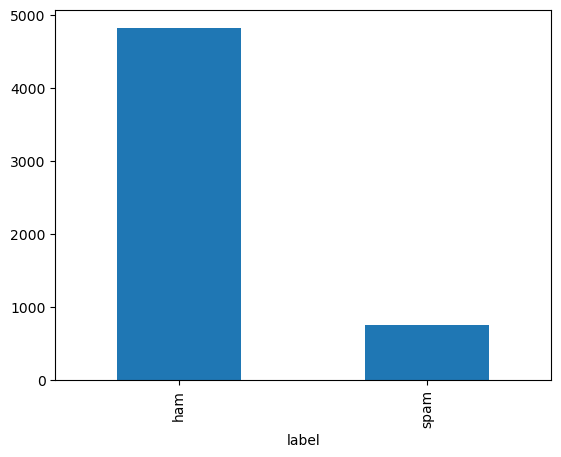

In [10]:
spam['label'].value_counts().plot(kind='bar')

NLP

In [11]:
# Preprocessing the Text in the Dataset

ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

Creating Bag of Words Model

In [12]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

Data Modeling

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42) 

Model Building

In [14]:
# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

RandomForestClassifier()

In [15]:
# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [16]:

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

Prediction

In [17]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

Testing the Model

In [18]:
# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Random Forest Classifier
Confusion Matrix: 
[[966   0]
 [ 23 126]]
Accuracy:  0.979372197309417
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[955  11]
 [ 19 130]]
Accuracy:  0.9730941704035875
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[955  11]
 [  9 140]]
Accuracy:  0.9820627802690582


<Axes: >

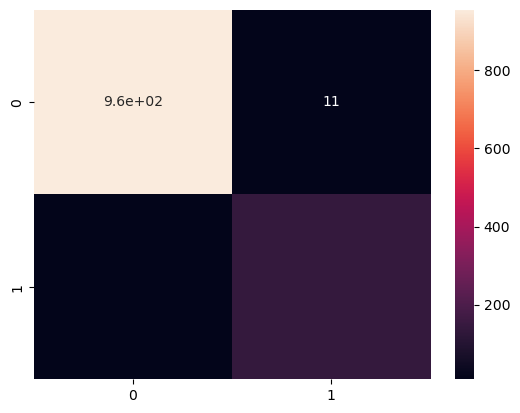

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [20]:
from sklearn.metrics import classification_report
report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)
     

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       966
        True       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.98      0.99      0.98       966
        True       0.92      0.87      0.90       149

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       966
        True       0.93      0.94      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.9

In [21]:
input_mail = ["Ok lar... Joking wif u oni..."]

# convert text to feature vectors
input_data_features = cv.transform(input_mail)

# making prediction

prediction = model2.predict(input_data_features)

if (prediction[0]==1):
  print('Spam mail')

else:
  print('Ham mail')

Ham mail


In [ ]:
with open("df.pkl", "wb") as file:
    pickle.dump(model3, file)

In [24]:
with open("cv.pkl", "wb") as file:
    pickle.dump(cv, file)

In [25]:
email = ["Ok lar... Joking wif u oni..."]
# Vectorize input
email_vectorized = cv.transform(email)
print("Vectorized Shape:", email_vectorized.shape)  # Debug

# Predict
prediction = model3.predict(email_vectorized)
print("Raw Prediction:", prediction)  # Debug
print("Final Output:", "Spam" if prediction[0] else "Not Spam")

Vectorized Shape: (1, 4000)
Raw Prediction: [False]
Final Output: Not Spam
